In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import fastcluster
import math

import pandas as pd
import numpy as np

from scipy import stats

In [2]:
correlation_scores = pd.read_csv("./TF_pathway_correlations_log10qvalue_noMCF7_v1.csv", index_col = "Pathway")
correlation_scores = -correlation_scores

In [3]:
correlation_scores

,Score_AR,Score_ARNTL,Score_ATF1,Score_ATF2,Score_ATF4,Score_BACH1,Score_CDX2,Score_CEBPA,Score_CEBPB,Score_CEBPD,...,Score_TFAP2C,Score_TP53,Score_TP63,Score_TWIST1,Score_USF1,Score_USF2,Score_VDR,Score_WT1,Score_YY1,Score_ZNF263
Pathway,,,,,,,,,,,,,,,,,,,,,
Alanine Metabolism,1.377268,0.372744,0.942679,2.685605,0.612376,0.574972,1.258116,0.641485,0.693408,1.837982,...,1.182652,0.823053,0.205188,0.607716,1.068523,0.505954,1.256894,0.571711,0.249944,1.397896
Alpha Linolenic Acid and Linoleic Acid Metabolism,0.564183,0.552512,0.386821,0.079780,0.218219,0.296474,0.047832,0.145297,0.013901,0.060211,...,0.205381,0.015894,0.172986,0.427496,0.704669,0.929505,0.319948,2.094511,0.954158,0.182225
Amino Sugar Metabolism,0.730641,0.469732,0.364449,3.387561,0.893654,0.185921,3.856153,0.547645,1.127094,1.449488,...,4.405555,1.697272,0.492730,2.035917,1.126159,1.442712,4.397159,0.450828,0.131829,3.190974
Ammonia Recycling,0.334294,0.301177,0.691932,3.025817,1.323817,1.629344,4.584281,0.506617,1.707372,1.713226,...,3.786769,1.341703,1.177934,1.076997,0.831232,0.231332,3.612645,0.512191,0.071319,2.173899
Androgen and Estrogen Metabolism,0.321988,0.210103,0.467566,0.769863,1.829812,2.484957,1.131642,0.574753,2.020251,0.760206,...,2.465218,0.773074,1.391384,0.456058,0.734669,0.704505,1.080285,0.583996,0.216061,1.592241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Urea Cycle,0.546170,0.292395,0.632436,3.738572,2.095220,0.990262,3.718410,1.109441,1.208756,4.233669,...,2.903544,1.539036,1.118782,1.151160,0.593058,0.759422,3.584927,0.411491,0.263330,2.695731
"Valine, Leucine, and Isoleucine Degradation",0.223274,0.191721,0.609696,2.636381,1.799145,1.160271,5.211972,0.334602,2.173942,1.889489,...,4.448554,1.170036,0.730227,1.221643,0.219644,0.285494,4.278202,0.299416,0.194862,7.147382
Vitamin B6 Metabolism,0.980048,0.632229,0.677734,0.449563,0.475348,0.993311,0.569597,0.491223,0.376441,0.552858,...,1.149772,0.298332,0.927593,0.580583,0.730178,0.480446,0.242670,0.644467,1.171603,0.671368


In [4]:
newcolumns = []
for item in correlation_scores.columns:
    splititem = item.split("_")[1]
    newcolumns.append(splititem)
    
correlation_scores.columns = newcolumns

In [5]:
warburg = correlation_scores.loc["Warburg Effect"]
warburg = warburg.sort_values()
warburg = pd.DataFrame(warburg)
warburg["index"] = warburg.reset_index().index

In [6]:
warburg

,Warburg Effect,index
NR2F2,0.027886,0
E2F4,0.079627,1
TAL1,0.106268,2
FOXM1,0.119607,3
E2F1,0.153713,4
...,...,...
REST,8.509331,101
TFAP2C,8.527444,102
SOX9,8.605762,103
FOXA1,8.882991,104


In [7]:
matplotlib.rcParams['figure.figsize'] = [6, 6]
palette_cmap = sns.light_palette(sns.color_palette("Set3")[4], as_cmap = True)
sns.set_style("ticks")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


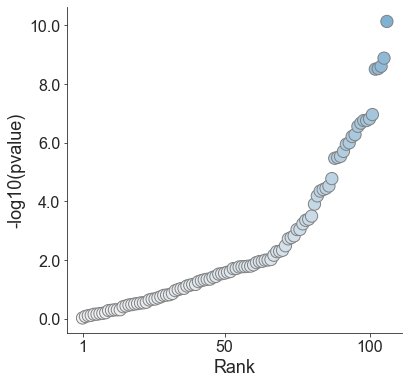

In [8]:
g = sns.scatterplot(warburg["index"]+1, warburg["Warburg Effect"], hue = warburg["Warburg Effect"], palette = palette_cmap
                , legend = False, s = 150, lw = 1, edgecolor = "grey")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("-log10(pvalue)", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("Warburgeffect_pvalues.pdf", bbox_inches = "tight")

In [9]:
warburg.to_csv("Warburg_dataframe.csv")

In [10]:
warburg = correlation_scores.loc["Glycolysis"]
warburg = warburg.sort_values()
warburg = pd.DataFrame(warburg)
warburg["index"] = warburg.reset_index().index

In [11]:
matplotlib.rcParams['figure.figsize'] = [6, 6]
palette_cmap = sns.light_palette(sns.color_palette("Set3")[4], as_cmap = True)
sns.set_style("ticks")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


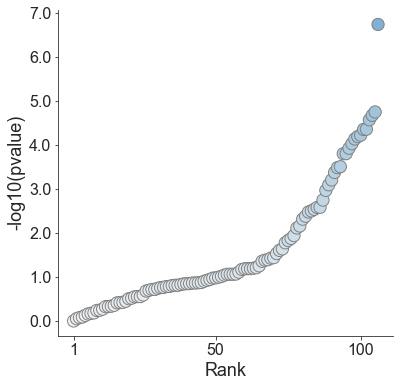

In [12]:
g = sns.scatterplot(warburg["index"]+1, warburg["Glycolysis"], hue = warburg["Glycolysis"], palette = palette_cmap
                , legend = False, s = 150, lw = 1, edgecolor = "grey")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("-log10(pvalue)", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("Glycolysis_TFpvalues.pdf", bbox_inches = "tight")

In [13]:
warburg.to_csv("Glycolysis_dataframe.csv")

In [14]:
warburg = correlation_scores.loc["Citric Acid Cycle"]
warburg = warburg.sort_values()
warburg = pd.DataFrame(warburg)
warburg["index"] = warburg.reset_index().index

In [15]:
warburg.to_csv("TCA_dataframe.csv")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


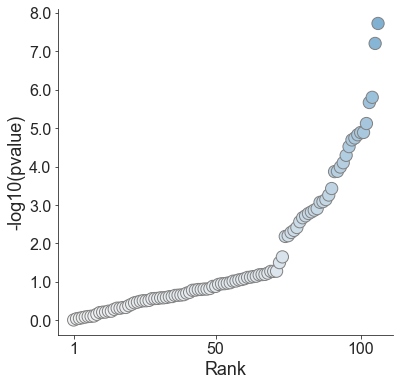

In [16]:
g = sns.scatterplot(warburg["index"]+1, warburg["Citric Acid Cycle"], hue = warburg["Citric Acid Cycle"], palette = palette_cmap
                , legend = False, s = 150, lw = 1, edgecolor = "grey")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("-log10(pvalue)", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("TCA_TFpvalues.pdf", bbox_inches = "tight")

In [17]:
warburg = correlation_scores.loc["Pentose Phosphate Pathway"]
warburg = warburg.sort_values()
warburg = pd.DataFrame(warburg)
warburg["index"] = warburg.reset_index().index

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


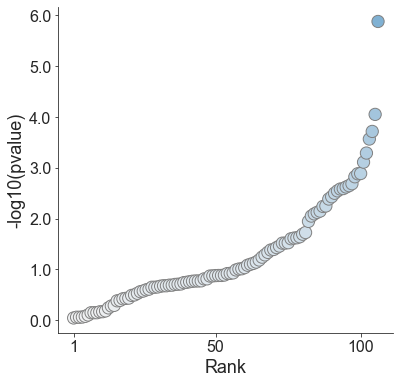

In [18]:
g = sns.scatterplot(warburg["index"]+1, warburg["Pentose Phosphate Pathway"], hue = warburg["Pentose Phosphate Pathway"], palette = palette_cmap
                , legend = False, s = 150, lw = 1, edgecolor = "grey")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("-log10(pvalue)", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("Pentosephosphate_TFpvalues.pdf", bbox_inches = "tight")

In [19]:
warburg.to_csv("Pentose_phosphate_dataframe.csv")

In [20]:
pathway_correlation = pd.read_csv("./TF_pathway_correlations_mean_noMCF7_v1.csv", index_col = "Pathway")

In [21]:
new_columns = []
for item in pathway_correlation.columns:
    item = item.split("Correlation_")[1]
    new_columns.append(item)
    
pathway_correlation.columns = new_columns
correlation_scores.columns = new_columns

In [22]:
pathway_correlation[pathway_correlation < 0] = -1
pathway_correlation[pathway_correlation >= 0] = 1

In [23]:
complete_pathway_pvalues = correlation_scores * pathway_correlation

In [24]:
HIF1A = complete_pathway_pvalues["HIF1A"]
HIF1A = HIF1A.sort_values()
HIF1A = pd.DataFrame(HIF1A)
HIF1A["index"] = HIF1A.reset_index().index

In [25]:
HIF1A.to_csv("HIF1A_pathways.csv")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


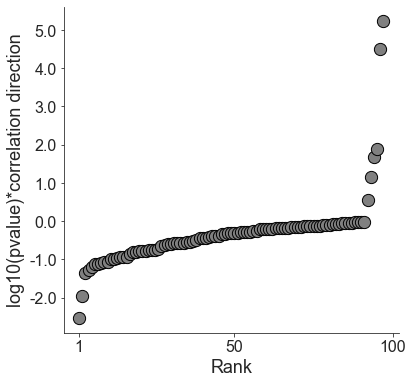

In [26]:
g = sns.scatterplot(HIF1A["index"]+1, HIF1A["HIF1A"], color = "grey"
    , legend = False, s = 150, lw = 1, edgecolor = "k")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("log10(pvalue)*correlation direction", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("HIF1A_correlations.pdf", bbox_inches = "tight")

In [27]:
correlation_scores.loc["Glutamate Metabolism"].sort_values().to_csv("Glutamate_metabolism_pathways.csv")

In [28]:
HIF1A = complete_pathway_pvalues["NFE2L2"]
HIF1A = HIF1A.sort_values()
HIF1A = pd.DataFrame(HIF1A)
HIF1A["index"] = HIF1A.reset_index().index

In [29]:
HIF1A.to_csv("NFE2L2_pathways.csv")

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


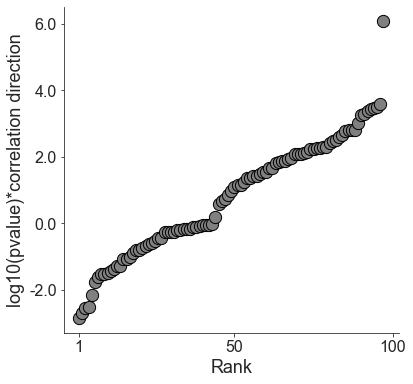

In [30]:
g = sns.scatterplot(HIF1A["index"]+1, HIF1A["NFE2L2"], color = "grey"
    , legend = False, s = 150, lw = 1, edgecolor = "k")
sns.despine()

g.set_xlabel("Rank", size = 18)
g.set_ylabel("log10(pvalue)*correlation direction", size = 18)

g.set_xticks([1,50,100])
g.set_xticklabels([1,50,100], size = 16)

g.set_yticklabels(g.get_yticks(), size = 16)

plt.savefig("NFE2L2_correlations.pdf", bbox_inches = "tight")

In [31]:
HIF1A

,NFE2L2,index
Pathway,,
Nicotinate and Nicotinamide Metabolism,-2.848819,0
Pyrimidine Metabolism,-2.702108,1
Glycine and Serine Metabolism,-2.537730,2
beta-Alanine Metabolism,-2.517348,3
Arginine and Proline Metabolism,-2.151495,4
...,...,...
Glutamate Metabolism,3.426408,92
Histidine Metabolism,3.473397,93
Pyruvate Metabolism,3.503903,94


In [32]:
metabolites_rnaseq_combined = pd.read_csv("../RNA_correlation/metabolite_rnaseq_correlation_matrix.csv", index_col = "Unnamed: 0")

In [33]:
zscore_dataframe = pd.DataFrame(stats.zscore(metabolites_rnaseq_combined))
zscore_dataframe.columns = metabolites_rnaseq_combined.columns
zscore_dataframe.index = metabolites_rnaseq_combined.index
zscore_dataframe_metabolites = zscore_dataframe.head(1099)

In [34]:
glucose_lactose = zscore_dataframe_metabolites.loc[["222", "26", "391", "115", "117"]]

In [35]:
glucose_lactose

,SHP77,PC9,LUDLU1,NCIH446,MALME3M,NCIH1755,HCC1187,CORL88,NCIH2171,NCIH1155,...,NCIH526,NCIH146,HL60,NCIH82,SF268,SF539,K562,DU4475,UO31,EKVX
222,21.591083,5.031191,8.807748,25.452252,5.910240,7.121406,11.271898,17.820120,4.191494,8.760121,...,14.011530,9.903480,8.980653,2.277840,5.010045,3.029603,21.221057,2.701364,5.008159,10.110995
26,6.829522,0.625573,1.587768,2.251008,2.250249,1.574397,1.087709,0.881381,1.712789,1.322012,...,3.652929,1.560078,1.252021,0.747485,1.066482,0.897034,0.582492,1.002098,1.128368,1.390073
391,0.933044,0.714495,0.567444,0.839744,0.618710,0.628622,0.500419,1.044819,0.426600,0.219881,...,0.867711,0.624959,0.466710,0.428883,0.459961,0.364576,0.541607,0.299919,0.375886,1.113626
115,6.178632,9.262305,5.727283,8.799168,11.301545,2.549894,16.729345,4.954907,0.335979,2.975699,...,7.767758,7.986725,5.679102,4.554761,4.275705,2.706787,7.206452,2.465636,2.351342,9.498056
117,41.795043,14.217082,9.236871,24.045048,25.235979,21.656845,21.777844,12.751824,11.832366,13.372623,...,16.788265,24.326301,20.210805,9.281799,35.242022,17.715925,18.042737,14.784152,20.722124,30.895055


In [36]:
correlation_scores = pd.read_csv("./TF_activities_AB.csv", index_col = "Unnamed: 0")

In [37]:
newindex = []
for item in correlation_scores.columns:
    newitem = item.split("_")[0]
    if newitem == "X786O":
        newitem = "786O"
    if newitem == "X5637":
        newitem = "5637"
    if newitem == "X769P":
        newitem = "769P"
    if newitem == "X647V":
        newitem = "647V"
    newindex.append(newitem)
correlation_scores.columns = newindex

In [38]:
HIF1A = correlation_scores.loc[["HIF1A"]]

In [39]:
merged = pd.concat([HIF1A, glucose_lactose], axis = 0, join = "inner").transpose()

In [40]:
merged

,HIF1A,222,26,391,115,117
5637,3.087468,13.025930,1.220123,0.650303,12.971117,27.527654
647V,1.007349,9.480804,1.305226,0.934818,7.568856,33.190251
769P,1.697717,7.341895,1.025046,0.353522,3.053982,27.642186
786O,4.255431,5.795868,1.838719,0.510520,1.470899,48.435232
A427,-2.256819,9.550922,5.846458,0.915957,4.348799,42.648867
...,...,...,...,...,...,...
UACC257,-1.116382,3.325572,0.565646,1.351201,2.994165,11.339256
UACC62,0.511087,57.998233,1.907024,0.810326,5.383489,28.142786
UMUC3,2.716063,12.604572,1.543960,0.530902,8.204788,27.864263
UO31,4.715176,5.008159,1.128368,0.375886,2.351342,20.722124


In [41]:
merged["Flux"] = np.log10(merged["115"])

/Users/davidshorthouse/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


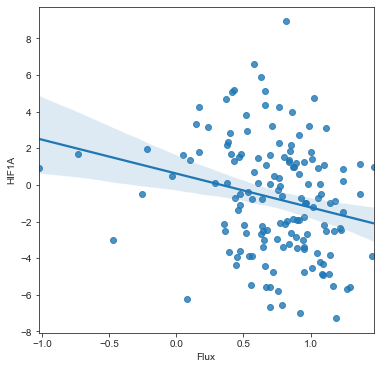

In [42]:
sns.regplot(x = "Flux", y = "HIF1A", data = merged)

In [43]:
glucose_lactose = metabolites_rnaseq_combined.loc[["222", "26", "733", "391", "1004", "958", "652", "115", "117"]]

In [44]:
glucose_lactose_log10 = np.log10(glucose_lactose)

<ipython-input-44-5e4871aea514>:1: RuntimeWarning: invalid value encountered in log10
  glucose_lactose_log10 = np.log10(glucose_lactose)


In [45]:
merged = pd.concat([HIF1A, glucose_lactose_log10], axis = 0, join = "inner").transpose()

In [46]:
matplotlib.rcParams['figure.figsize'] = [8, 6]

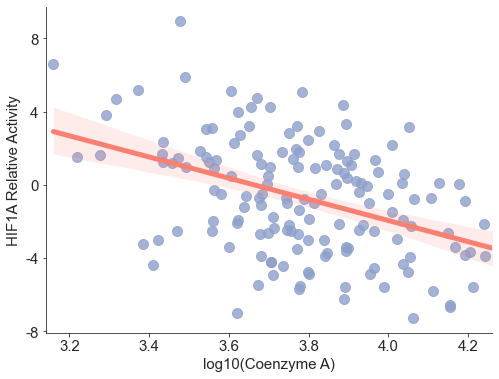

In [47]:
g = sns.regplot(x = "958", y = "HIF1A", data = merged, color = sns.color_palette("Set2")[2],
               
               scatter_kws={"s": 100}, line_kws={"color": sns.color_palette("Set3")[3], "lw": 5}
               )
sns.despine()

g.set_xlabel("log10(Coenzyme A)", size = 15)
g.set_ylabel("HIF1A Relative Activity", size = 15)

g.set_xticklabels(g.get_xticks(), size = 15)
g.set_yticks([-8, -4,0,4,8])
g.set_yticklabels(g.get_yticks(), size = 15)
g.set_xlim(3.14, 4.26)

plt.savefig("HIF1A_coenzymeA_correlation.pdf", bbox_inches = "tight")

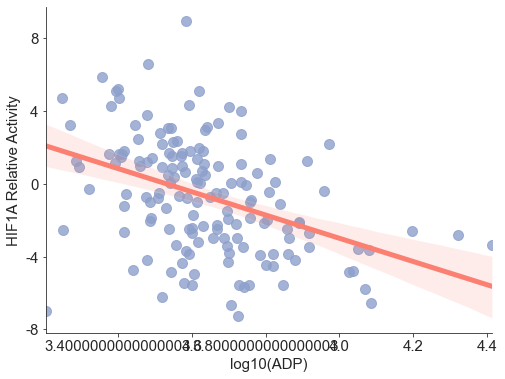

In [48]:
g = sns.regplot(x = "652", y = "HIF1A", data = merged, color = sns.color_palette("Set2")[2],
               
               scatter_kws={"s": 100}, line_kws={"color": sns.color_palette("Set3")[3], "lw": 5}
               )
sns.despine()

g.set_xlabel("log10(ADP)", size = 15)
g.set_ylabel("HIF1A Relative Activity", size = 15)

g.set_xticklabels(g.get_xticks(), size = 15)
g.set_yticks([-8, -4,0,4,8])
g.set_yticklabels(g.get_yticks(), size = 15)
plt.savefig("HIF1A_ADP_correlation.pdf", bbox_inches = "tight")

In [49]:
NRF2 = correlation_scores.loc[["NFE2L2"]]

In [50]:
merged = pd.concat([NRF2, np.log10(metabolites_rnaseq_combined.head(1099))], axis = 0, join = "inner").transpose()

<ipython-input-50-550eb8edd2e7>:1: RuntimeWarning: divide by zero encountered in log10
  merged = pd.concat([NRF2, np.log10(metabolites_rnaseq_combined.head(1099))], axis = 0, join = "inner").transpose()
<ipython-input-50-550eb8edd2e7>:1: RuntimeWarning: invalid value encountered in log10
  merged = pd.concat([NRF2, np.log10(metabolites_rnaseq_combined.head(1099))], axis = 0, join = "inner").transpose()


In [51]:
NRF2_correlations = merged.corr()["NFE2L2"]

In [52]:
NRF2_correlations.sort_values()

625      -0.438959
530      -0.372965
117      -0.338787
39       -0.338623
121      -0.334702
            ...   
586       0.429588
201       0.452564
372       0.457619
976       0.462120
NFE2L2    1.000000
Name: NFE2L2, Length: 1100, dtype: float64

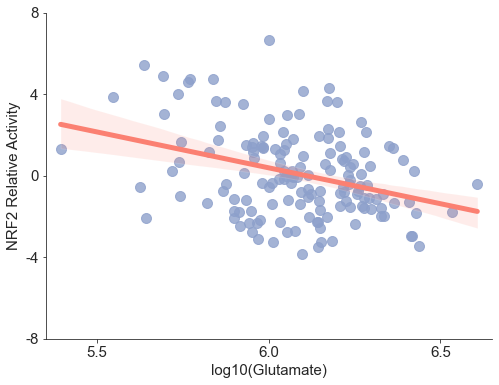

In [59]:
g = sns.regplot(x = "117", y = "NFE2L2", data = merged, color = sns.color_palette("Set2")[2],
               
               scatter_kws={"s": 100}, line_kws={"color": sns.color_palette("Set3")[3], "lw": 5}
               )
sns.despine()

g.set_xlabel("log10(Glutamate)", size = 15)
g.set_ylabel("NRF2 Relative Activity", size = 15)

g.set_xticks([5.5, 6.0, 6.5])
g.set_xticklabels(g.get_xticks(), size = 15)
g.set_yticks([-8, -4,0,4,8])

g.set_xlim(5.35, 6.65)


g.set_yticklabels(g.get_yticks(), size = 15)
plt.savefig("NRF2_glutamate_correlation.pdf", bbox_inches = "tight")

In [95]:
merged

,NFE2L2,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
5637,-1.383848,-0.727110,-1.483510,0.061130,-1.149601,-0.965107,-0.692448,-1.363062,-1.412567,-1.165417,...,-1.681126,-1.373798,-1.498091,NaN,-0.767321,-1.682838,-1.906919,NaN,-2.100763,-2.096498
647V,-2.016561,-0.840453,-1.881541,0.009452,-1.195284,-0.978262,-0.975075,-1.407989,-1.544739,-1.410449,...,-1.495268,-1.349178,-1.286443,-3.145693,-0.900735,-1.467510,-2.436152,NaN,-2.111411,-2.099603
769P,1.924056,-0.845075,-2.311932,-0.035734,-1.219028,-1.140518,-0.869483,-1.570008,-1.608878,-1.784572,...,-1.562336,-1.114792,-1.378273,-3.519797,-0.912892,-1.542269,NaN,NaN,NaN,-2.004368
786O,0.759900,-0.879921,-1.682276,0.025256,-1.154681,-1.111304,-1.090518,-1.550319,-1.716454,-1.716120,...,-1.634744,-1.314217,-1.369758,NaN,-0.870900,-1.603793,NaN,NaN,-2.342543,-2.119868
A427,0.557148,-0.786959,-1.159731,0.210130,-1.037887,-1.068774,-1.018056,-1.305050,-1.370827,-1.095413,...,-1.471201,-1.425846,-1.318916,NaN,-0.863821,-1.446751,NaN,NaN,-3.387530,-2.319429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UACC257,-0.346652,-1.024046,-2.818664,-0.299448,-1.096321,-1.699897,-1.336239,-1.776701,-2.006685,-1.738147,...,-1.804310,-1.860010,-1.643164,NaN,-1.217098,-2.114879,NaN,NaN,NaN,NaN
UACC62,-2.259266,-0.889751,-1.466245,0.066627,-1.139617,-1.261364,-1.021912,-1.468281,-1.649335,-1.375477,...,-1.834657,-1.574320,-1.392278,-1.994955,-0.878586,-1.765304,NaN,NaN,-2.459499,-2.642517
UMUC3,-0.913451,-0.890837,-1.670508,0.008236,-1.084206,-1.181113,-1.028354,-1.652818,-1.836055,-1.393922,...,-1.577795,-1.433167,-1.379247,-2.196153,-0.839809,-1.673468,NaN,NaN,-2.097212,-1.930350
UO31,-0.153124,-0.949147,-1.703310,-0.190957,-1.268156,-1.305440,-1.293901,-1.637532,-1.764516,-1.511432,...,-1.918396,-1.690260,-1.580574,NaN,-0.854639,-2.009029,NaN,NaN,-2.491512,-2.496997
